<a href="https://colab.research.google.com/github/LAGISHETTYNANDITHA/2203A52097/blob/main/HandWrittenDigits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:


import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [4]:


from sklearn.metrics import classification_report

In [5]:


seed=4
tf.random.set_seed(4)

In [6]:


data = tf.keras.datasets.mnist

In [7]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [8]:

X_train = np.concatenate((X_train, X_test))
y_train = np.concatenate((Y_train, Y_test))
y_train = y_train.astype(int)


In [9]:


X_train.shape, y_train.shape

((70000, 28, 28), (70000,))

In [10]:


X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:

y_train

array([5, 0, 4, ..., 4, 5, 6])

In [12]:

len(pd.unique(y_train))

10

In [17]:
valid_data = pd.read_csv('/content/drive/MyDrive/train.csv')

In [16]:

test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

In [18]:

y_validation = valid_data['label'].values
x_validation = valid_data.drop('label', axis = 1).values


In [21]:

x_validation

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:


y_validation

array([1, 0, 1, ..., 7, 6, 9])

In [19]:

x_train = X_train.reshape(X_train.shape[0], 28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)
x_test = test_data.values.reshape(test_data.shape[0], 28,28)

x_train.shape, y_train.shape, x_validation.shape, y_validation.shape,  x_test.shape


((70000, 28, 28), (70000,), (42000, 28, 28), (42000,), (28000, 28, 28))

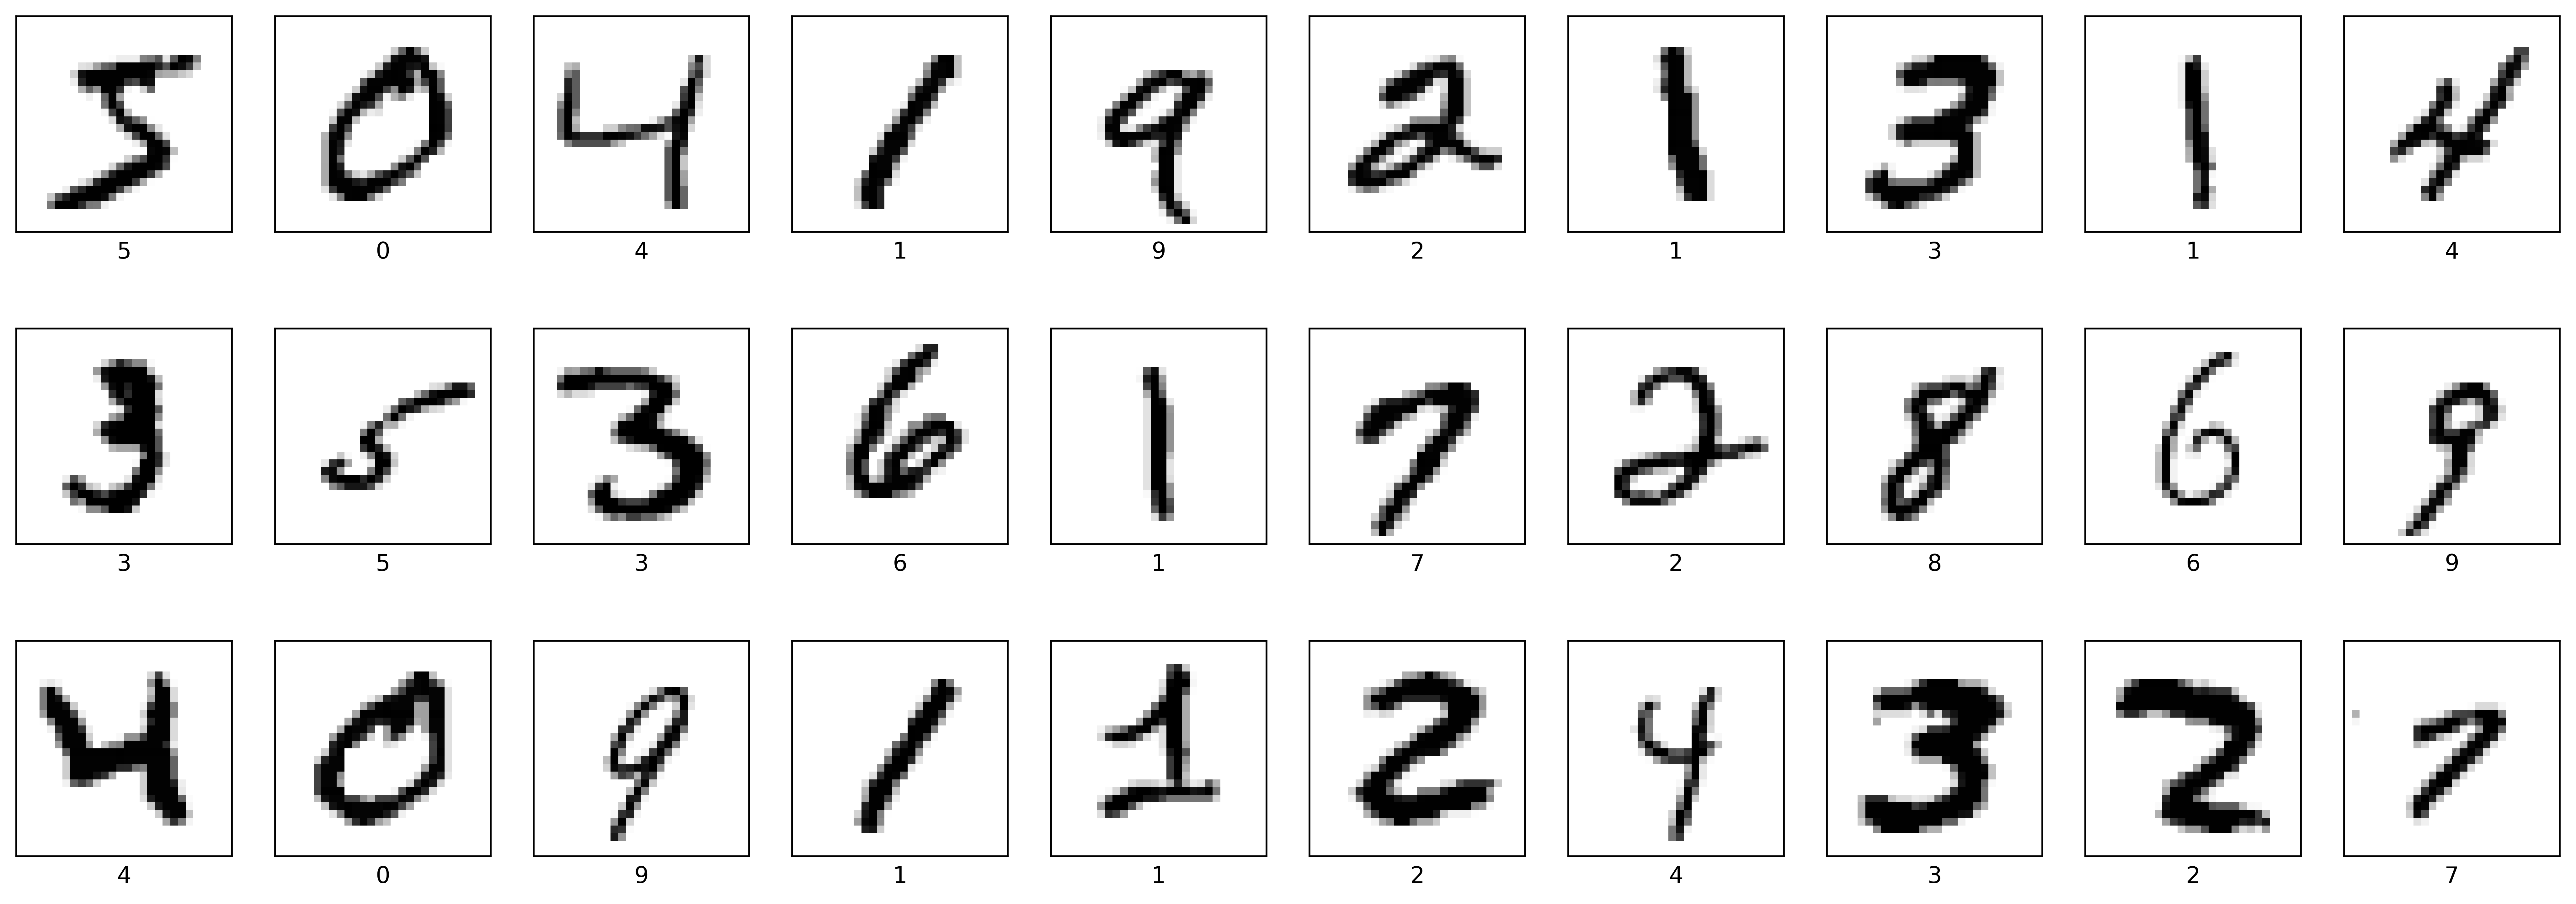

In [22]:

plt.figure(figsize=(20,7), dpi = 523)
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [23]:

x_train = x_train.reshape(-1,28,28,1)
x_valid = x_validation.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print('Train Data shape      :',x_train.shape)
print('Validation Data shape :',x_valid.shape)
print('Test Data shape       :',x_test.shape)


Train Data shape      : (70000, 28, 28, 1)
Validation Data shape : (42000, 28, 28, 1)
Test Data shape       : (28000, 28, 28, 1)


In [24]:
x_train, x_valid, x_test = x_train / 255, x_valid / 255, x_test / 255

In [25]:

y_train_ = tf.keras.utils.to_categorical(y_train)
y_valid_ = tf.keras.utils.to_categorical(y_validation)

In [26]:
batch = 100
epochs = 70

steps_per_epoch = x_train.shape[0]//batch
steps_per_epoch

700

In [27]:


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,zoom_range=0.15)

image_generator = datagen.flow(x_train, y_train_, batch_size=batch, seed=seed,)

In [28]:


print('The Unique digits are :', sorted(pd.unique(y_train)))
n = len(pd.unique(y_train))
print('There are total',n, 'unique digits')

The Unique digits are : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
There are total 10 unique digits


In [29]:
model = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu', input_shape = (28,28,1)),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),         # Convolution Layer with relu
    layers.Conv2D(64, (4, 4), activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),                                         # MaxPooling layer with relu

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(150, activation = tf.nn.relu),     # Hidden layer 1
    layers.Dense(150, activation = tf.nn.relu),      # Hidden layer2
    layers.Dense(n, activation = tf.nn.softmax)     # Output layer softmax
])

In [30]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        65600     
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        16448     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          6

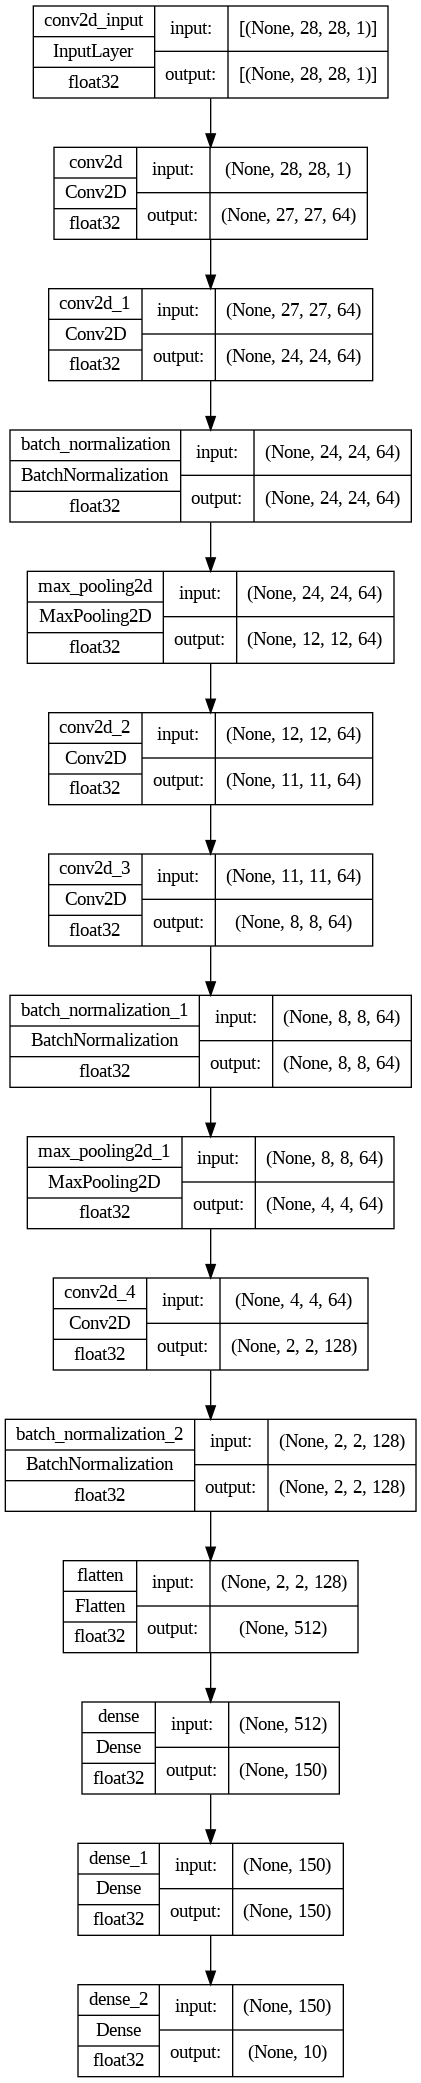

In [31]:

tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, expand_nested=True)


In [32]:

### .et the learning rate =
lr_rate = 0.0001

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3,
                                                  min_delta = 1e-4,
                                                  restore_best_weights = True)


In [34]:

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = 'saved_model/best_model_todate',
                                                 save_best_only = True,
                                                 save_weights_only = True,
                                                 monitor='val_accuracy',
                                                 mode='max')

In [35]:
tn = tf.keras.callbacks.TerminateOnNaN()

In [36]:

scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = lr_rate,
                                                           decay_steps = steps_per_epoch//4,
                                                           decay_rate= 0.80,
                                                           staircase=True)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [37]:
lr_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                  factor = 0.1,
                                                  patience = 4,
                                                  verbose = 3)


In [38]:

loss_object = tf.keras.losses.CategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_rate)

In [39]:

model.compile(optimizer=optimizer,loss=loss_object, metrics=['accuracy'])


In [1]:
history = model.fit(image_generator,
                    epochs=epochs,
                    validation_data=(x_valid, y_valid_),
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [lr_scheduler, lr_plateau, checkpoint_callback, early_stopping, tn]
                   )

NameError: name 'model' is not defined

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


loss, accuracy = model.evaluate(x_valid, y_valid_)
print('The accuracy of model on unknown data is',round((accuracy*100),4),'%')

In [ ]:


history_dict = history.history
history_dict.keys()

In [ ]:


acc = history_dict['accuracy']
acc

In [ ]:

loss = history_dict['loss']
loss

In [ ]:

val_acc = history_dict['val_accuracy']
val_acc

In [ ]:

val_loss = history_dict['val_loss']
val_loss

In [ ]:


epochs = np.arange(1, len(acc) + 1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

y_predicted = model.predict(x_valid)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',y_validation[:10])

In [ ]:
cm = tf.math.confusion_matrix(labels = y_validation, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:

print("Classification Report: \n", classification_report(y_validation, y_predicted_labels))


In [ ]:

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Pred: {} ({:2.0f}%) \n Truth : {}".format(predicted_label, (100*np.max(predictions_array)),
                                                          true_label), color=color)



In [ ]:

def plot_value_array(i, predictions_array, true_labels):
    true_label = true_labels[i]
    plt.grid(False)
    plt.xticks(range(10))

    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)


    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


In [ ]:
# for 25 images
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

In [ ]:

count = 0
wrong_predictions = []
for i in range(len(y_validation)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != y_validation[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in Validation datasets')
print('Wrong predicted indices :\n',wrong_predictions)


In [ ]:

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], y_validation, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], y_validation)
plt.tight_layout()
plt.show()

In [ ]:

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print('Predicted Label :',y_predicted_labels[:10])
print('Actual Label    :',Y_test[:10])


In [ ]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
print("Classification Report: \n", classification_report(Y_test, y_predicted_labels)) ## 95%accuracy



In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 523)
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()

In [ ]:
count = 0
wrong_predictions = []
for i in range(len(Y_test)):
    predicted_label = np.argmax(y_predicted[i])
    if predicted_label != Y_test[i]:
        count +=1
        wrong_predictions.append(i)
print('There are',count,'wrong predictions in test datasets')
print('Wrong predicted indices :\n',wrong_predictions)


In [ ]:

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi = 723)

for ix in range(num_images):
    i = wrong_predictions[ix]
    plt.subplot(num_rows, 2*num_cols, 2*ix+1)
    plot_image(i, y_predicted[i], Y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*ix+2)
    plot_value_array(i, y_predicted[i], Y_test)
plt.tight_layout()
plt.show()